In [1]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("order.csv")
t = data.iloc[:, -8:]
t.head()

,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
0,9.46,87.06,3.48,0.00,0.00,0.00,0.0,0.0
1,15.87,75.80,6.22,2.12,0.00,0.00,0.0,0.0
2,16.88,56.75,3.37,16.48,6.53,0.00,0.0,0.0
3,28.81,35.99,11.78,4.62,2.87,15.92,0.0,0.0
4,24.13,60.38,7.78,7.72,0.00,0.00,0.0,0.0


In [9]:
class KMeans:
    '''聚类'''
    
    def __init__(self, k, times):
        '''初始化
        
        Parameters
        ----
        k：聚类个数
        times:迭代'''
        
        self.k = k
        self.times = times
        
    def fit(self, X):
        
        X = np.asarray(X)
        # 设置随机种子，以便于可以产生相同的随机序列
        np.random.seed(0)
        # 随机选k个点作为聚类中心
        self.cluster_centers_ = X[np.random.randint(0, len(X), self.k)]
        self.labels_ = np.zeros(len(X))
        
        for t in range(self.times):
            for index, x in enumerate(X):
                # 计算每个样本与聚类中心的距离，按行加起来
                dis = np.sqrt(np.sum((x - self.cluster_centers_) ** 2, axis=1))
                # 将第index个点设置label，表示所属组，范围0～k-1
                self.labels_[index] = dis.argmin()
            # 更新聚类中心
            for i in range(self.k):
                #按列求平均
                self.cluster_centers_[i] = np.mean(X[self.labels_ == i], axis=0)
                
    def predict(self, X):
        
        X = np.asarray(X)
        result = np.zeros(len(X))
        
        for index, x in enumerate(X):
            dis = np.sqrt(np.sum((x - self.cluster_centers_) ** 2, axis=1))
            result[index] = dis.argmin()
            
        return result

In [10]:
kmeans = KMeans(3, 50)
kmeans.fit(t)

In [11]:
kmeans.cluster_centers_

array([[46.33977936,  8.93380516, 23.19047005, 13.11741633,  4.8107557 ,
         1.17283735,  1.35704647,  0.95392773],
       [19.5308009 , 50.42856608, 14.70652695,  7.89437019,  3.69829234,
         0.91000428,  1.92515077,  0.82113238],
       [ 7.93541008,  4.56182052, 30.65583437, 18.57726789,  8.61597195,
         1.28482514, 26.81950293,  1.30158264]])

In [13]:
t[kmeans.labels_ == 0].head()

,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
15,48.23,20.37,15.38,8.29,7.73,0.0,0.0,0.0
23,24.10,22.29,38.69,14.92,0.00,0.0,0.0,0.0
24,36.51,31.93,27.18,4.38,0.00,0.0,0.0,0.0
40,22.76,0.00,0.00,77.24,0.00,0.0,0.0,0.0
43,65.64,12.36,21.99,0.00,0.00,0.0,0.0,0.0


In [14]:
kmeans.predict([[30,30,40,0,0,0,0,0], [0,0,0,0,0,30,30,40],[30,30,0,0,0,0,20,20]])

array([0., 2., 1.])

In [32]:
t2 = data.loc[:, "Food%": "Fresh%"]
kmeans = KMeans(5,10)
kmeans.fit(t2)

In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 设置中文显示
mpl.rcParams["font.family"] = "Droid Sans Fallback"
mpl.rcParams["axes.unicode_minus"] = False

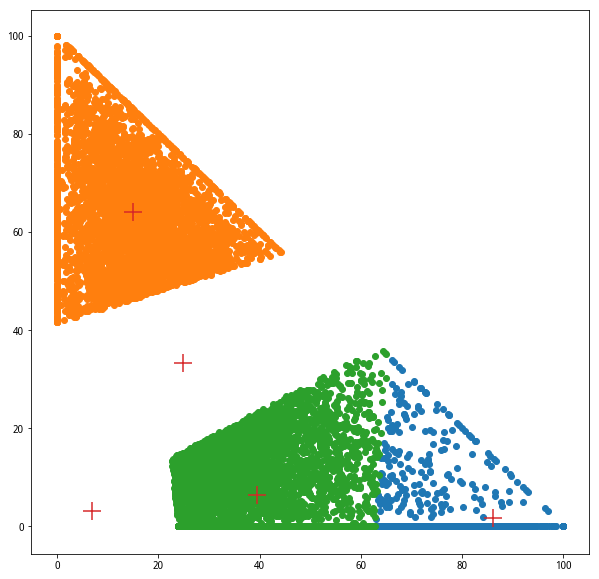

In [34]:
plt.figure(figsize=(10,10))

plt.scatter(t2[kmeans.labels_ == 0].iloc[:, 0], t2[kmeans.labels_ == 0].iloc[:,1], label="类别1")
plt.scatter(t2[kmeans.labels_ == 1].iloc[:, 0], t2[kmeans.labels_ == 1].iloc[:,1], label="类别2")
plt.scatter(t2[kmeans.labels_ == 2].iloc[:, 0], t2[kmeans.labels_ == 2].iloc[:,1], label="类别3")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="+", s=300)